<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h3 align="left"><font color=black><b>IT1364 - Data Analysis & Visualisation Module.</font></h3></b>

**In this individual assignment for the IT1364 - Data Analysis & Visualisation Module, we explore a dataset containing various health metrics from heart patients, including age, blood pressure, heart rate, and more. Our objective is to develop a predictive model that can accurately identify individuals with heart disease. Given the serious implications of missing a positive diagnosis, our primary focus is on maximizing the recall for the positive class to ensure all potential patients are identified.**

**Done By: Sandhya Palaniappan.**

<h3 align="left"><font color=black><b>Objectives:</font></h3></b>

* **Data Exploration**: Identify patterns, distributions, and interrelations within the dataset.
* **In-depth Exploratory Data Analysis (EDA)**: Investigate bivariate relationships with the target variable. <br><br>
* **Data Preprocessing**:
  - Eliminate non-essential features.
  - Fill in missing values.
  - Manage outliers.
  - Encode categorical data.
  - Normalize skewed data distributions. <br><br>
* **Model Development**:
  - Construct pipelines for models needing data scaling.
  - Develop and optimize classifiers like KNN, SVM, Decision Trees, and Random Forest.
  - Focus on maximizing recall for class 1 to ensure accurate detection of heart disease. <br><br>
* **Performance Evaluation**:
  - Assess model efficacy using precision, recall, and F1-score metrics to determine their effectiveness. <br><br>

<a id="import"></a>
### **Step 1: Import Libraries.**

In [ ]:
# Suppress warnings for cleaner output.
import warnings
warnings.filterwarnings('ignore')

# Import essential libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Import sklearn utilities for data splitting and transformations.
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Import classifiers from sklearn.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import utilities for model evaluation and hyperparameter tuning.
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# Ensure that plots are displayed inline in the Jupyter notebook.
%matplotlib inline

In [ ]:
# Adjust the default resolution of figures created with matplotlib to enhance clarity.
plt.rcParams['figure.dpi'] = 200

# Apply Seaborn styles to plots: Specify background color and select a dark grid style for better visibility.
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

### **Step 2: Read Dataset.**

In [ ]:
# Load the dataset from the specified file path.
df = pd.read_csv('/kaggle/input/heartcsv/heart.csv')
df  # Display the DataFrame to inspect the initial few records.

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

<h3 align="left"><b><font color=black>Dataset Description:</font></h3></b>
    
| **Variable** | **Description** |
|     :---      |       :---      |      
| **age** | Patient's age in years |
| **sex** | Patient's gender (0 = male, 1 = female) |
| **cp** | Type of chest pain: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic |
| **trestbps** | Resting blood pressure (mm Hg) |
| **chol** | Serum cholesterol level (mg/dl) |                     
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) |
| **restecg** | Resting electrocardiographic results: <br> 0: Normal <br> 1: ST-T wave abnormality <br> 2: Possible or definite left ventricular hypertrophy |  
| **thalach** | Maximum heart rate achieved during stress test |                      
| **exang** | Exercise-induced angina (1 = yes, 0 = no) |
| **oldpeak** | ST depression induced by exercise relative to rest |
| **slope** | Slope of the peak exercise ST segment: <br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping |                      
| **ca** | Number of major vessels (0-4) colored by fluoroscopy |              
| **thal** | Thalium stress test result: <br> 0: Normal <br> 1: Fixed defect <br> 2: Reversible defect <br> 3: Not specified  |
| **target** | Heart disease diagnosis (0 = no disease, 1 = disease present) |


### **Step 3 - Dataset Overview.**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
**Next, I will conduct a thorough exploration of the dataset.**

<a id="basic"></a>
### <b><span style='color:#ff826e'>Step 3.1 - </span><span style='color:red'> Basic Information about the Dataset.</span></b>

In [ ]:
# Display a summary overview of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=black><b>✅ Inferences:</b></font></h3>

* **Number of Entries**: The dataset contains **303 entries**, with index values ranging from 0 to 302.
    
* **Columns**: There are **14 columns** representing various patient attributes and test results.
    
* **Data Types**:
    - The majority of columns (13 out of 14) are of the **int64** data type.
    - The **oldpeak** column is of the **float64** data type.
    
* **Missing Values**: There are no missing values in the dataset, as all columns have 303 non-null entries.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:110%; text-align:left">

**<span style="font-size:130%; color:red"> Note: </span>**

Based on the data types and the feature explanations provided earlier, we observe that **9 columns** (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `target`) are technically **numerical** but **categorical** in terms of their meaning.

These features should be converted to string (**object**) data type for proper analysis and interpretation.

In [ ]:
# Define a list of continuous features.
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# List all features that are not included in the continuous features list.
# These will be treated as categorical and will be converted to object data type.
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified categorical features to object data type.
# This ensures that operations intended for categorical data can be applied correctly.
df[features_to_convert] = df[features_to_convert].astype('object')

# Display the data types of all columns to verify changes.
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

<a id="num_statistics"></a>
### <b><span style='color:#ff826e'>Step 3.2 - </span><span style='color:red'> Summary Statistics for Numerical Variables.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**Next, we will explore the summary statistics for our numerical attributes.**

In [ ]:
# Calculate and display summary statistics for numerical variables.
# The 'describe()' function computes summary statistics including mean, std, min, max, etc.
# Transposing the result with '.T' for better readability of the attributes.
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=black><b>Numerical Features:</b></font></h3>


* **`age`**: The average age of the patients is 54.4 years, with ages ranging from 29 to 77 years.<br><br>
* **`trestbps`**: The average resting blood pressure of the patients is 131.62 mm Hg, with a range from 94 to 200 mm Hg.<br><br>
* **`chol`**: The average cholesterol level measured is 246.26 mg/dl, spanning from 126 to 564 mg/dl.<br><br>
* **`thalach`**: The typical maximum heart rate achieved by the patients is approximately 149.65, ranging from 71 to 202.<br><br>
* **`oldpeak`**: The average ST depression induced by exercise relative to rest is about 1.04, with observed values between 0 and 6.2. <br><br>

<a id="cat_statistics"></a>
### <b><span style='color:#ff826e'>Step 3.3 - </span><span style='color:red'> Summary Statistics for Categorical Variables.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**Next, we will examine the summary statistics for the categorical features in the dataset.**

In [ ]:
# Retrieve summary statistics for categorical variables.
# 'include='object'' ensures that the statistics are only computed for categorical data.
df.describe(include='object')

sex   cp  fbs  restecg  exang  slope   ca  thal  target
count   303  303  303      303    303    303  303   303     303
unique    2    4    2        3      2      3    5     4       2
top       1    0    0        1      0      2    0     2       1
freq    207  143  258      152    204    142  175   166     165

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=black><b>Categorical Features (object data type): </b></font></h3>

* **`sex`**: This feature has two unique values. Males (denoted as 0) are the predominant category, appearing 207 times in a dataset of 303 records. <br><br>
* **`cp`**: There are four distinct types of chest pain identified, with type "__0__" being the most prevalent, recorded 143 times. <br><br>
* **`fbs`**: Comprising two categories, the most common is "__0__", indicating a fasting blood sugar level below 120 mg/dl, noted 258 times. <br><br>
* **`restecg`**: This feature presents three unique categories. The most frequently occurring category is "__1__", observed 152 times. <br><br>
* **`exang`**: It has two unique categories. The category "__0__", indicating no exercise-induced angina, is the most common, appearing 204 times. <br><br>
* **`slope`**: With three different slopes noted, the most common slope type is "__2__", which occurs 142 times. <br><br>
* **`ca`**: This variable represents the number of major vessels colored by fluoroscopy, ranging across five unique values, with "__0__" being most frequent at 175 occurrences. <br><br>
* **`thal`**: There are four unique results for this feature. The most commonly observed type is "__2__", indicating a reversible defect, seen 166 times. <br><br>
* **`target`**: Featuring two unique categories, the value "__1__", indicating the presence of heart disease, is the most common, noted in 165 entries.<br><br>


### <h3 style="background-color:red; font-family:calibri; color:black; font-size:150%; text-align:center; border-radius:15px 50px;"><b>Step 4 -  Exploratory Data Analysis (EDA) </b></h3>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**We conduct univariate analysis on the dataset's features, categorized by their datatype:**

* **For continuous data:** **Histograms are used to examine the distribution of each feature. This approach helps us identify the central tendency, variability, and shape of the data distribution.** <br><br>
* **For categorical data:** **Bar charts are employed to display the frequency of each category. This visualization offers a clear view of how prevalent each category is within the respective feature.** <br><br>

**Through these visualization methods, we will gain a deeper understanding of the unique attributes of each feature in the dataset.**

<a id="univariate"></a>
### <b><span style='color:#ff826e'>Step 4.1 - </span><span style='color:red'> Univariate Analysis.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

We undertake univariate analysis on the dataset's features, based on their datatype:

* For __continuous data__: We employ histograms to gain insight into the distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.

    
* For __categorical data__: Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

<a id="num_uni"></a>
### <b><span style='color:#ff826e'>Step 4.1.1 - </span><span style='color:red'> Univariate Analysis of Numerical Variables.</span></b>

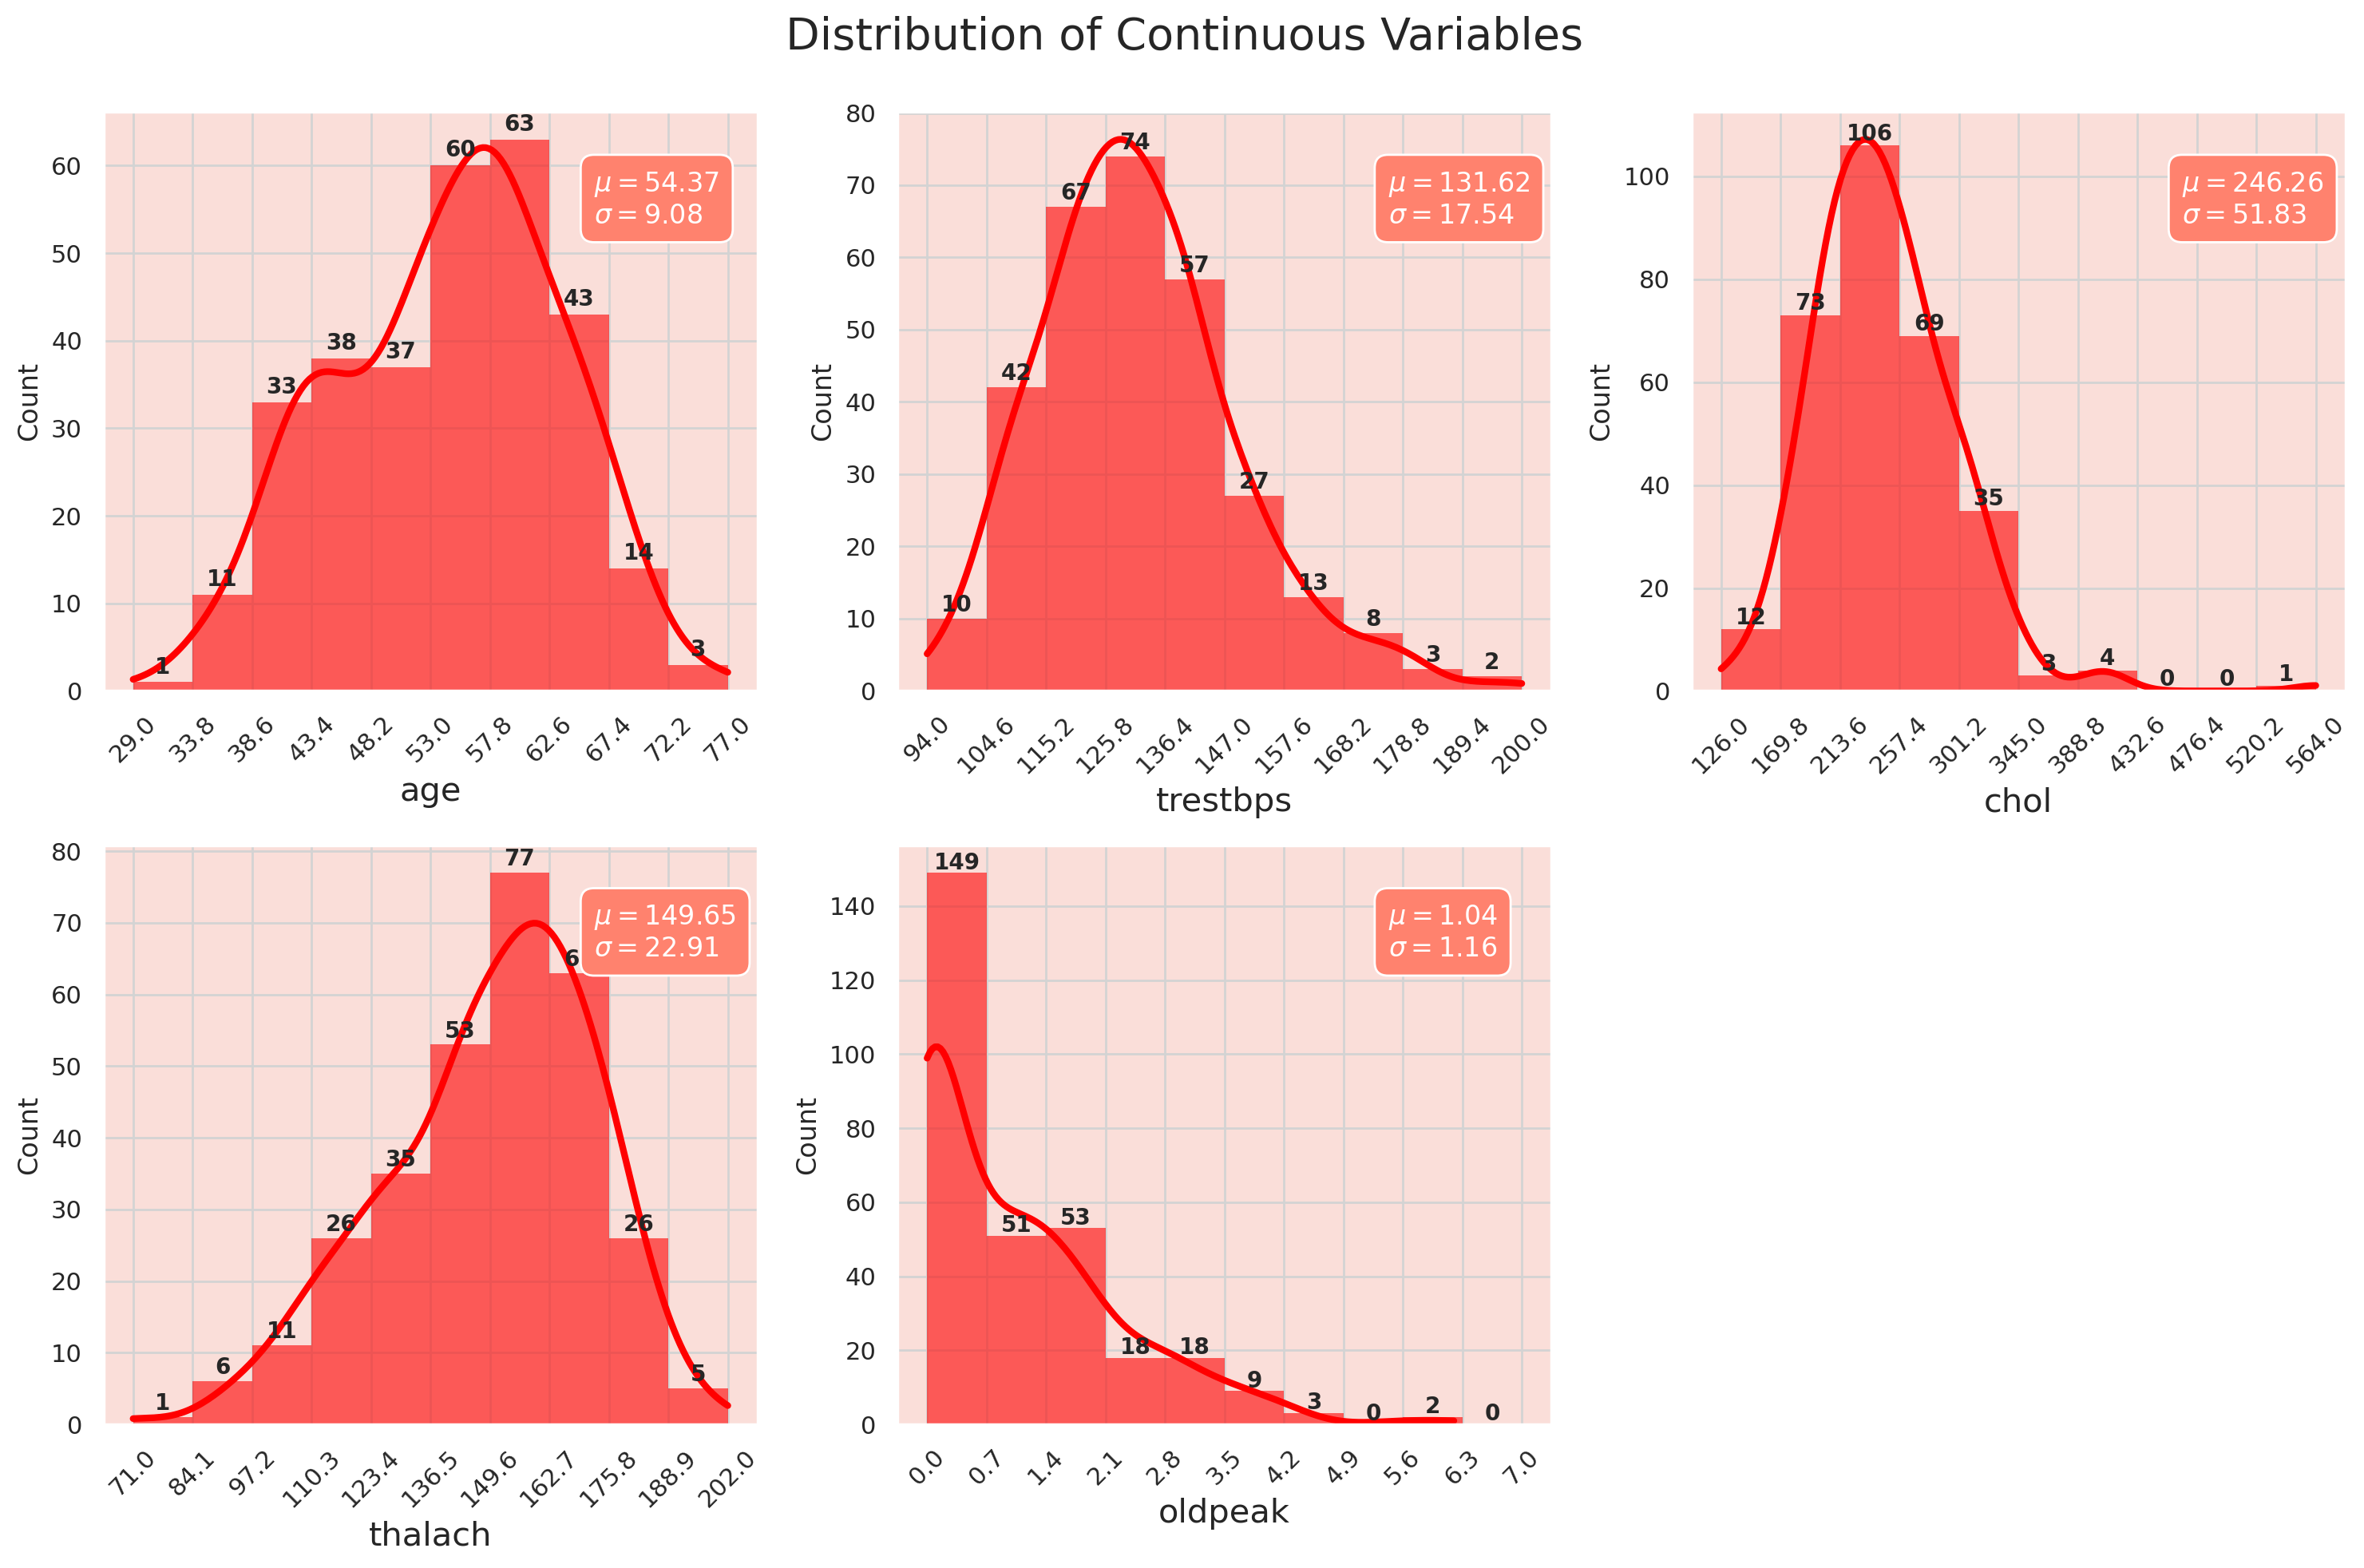

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out continuous features for the univariate analysis.
df_continuous = df[continuous_features]

# Set up the subplot grid with 2 rows and 3 columns.
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through each column in the dataframe of continuous features.
for i, col in enumerate(df_continuous.columns):
    # Determine subplot row and column index.
    x = i // 3
    y = i % 3

    # Calculate histogram values and bin edges based on the data range.
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    # Create histogram with density plot on the specified axes object.
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    # Set the x-label with a font size.
    ax[x, y].set_xlabel(col, fontsize=15)
    # Set the y-label with a font size.
    ax[x, y].set_ylabel('Count', fontsize=12)
    # Set x-ticks rounding bin edges.
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    # Rotate x-tick labels for better readability.
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    # Add grid for better visibility of ticks.
    ax[x, y].grid(color='lightgrey')

    # Annotate histogram bars with their heights for clarity.
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    # Text string for displaying mean and standard deviation on the plot.
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    # Position the text box inside the plot.
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Turn off the axis for the last subplot if there are fewer than 6 variables.
ax[1, 2].axis('off')

# Set a super title for the entire figure.
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
# Adjust layout for better spacing between subplots.
plt.tight_layout()
# Adjust top margin to fit the super title.
plt.subplots_adjust(top=0.92)
# Display the plot.
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=black><b>✅ Inferences:</b></font></h3>

* **Age (`age`)**: **The distribution is fairly uniform with a noticeable peak around the late 50s. The mean age is approximately 54.37 years, with a standard deviation of 9.08 years.**

* **Resting Blood Pressure (`trestbps`)**: **Most individuals have resting blood pressure values concentrated around 120-140 mm Hg. The mean resting blood pressure is approximately 131.62 mm Hg, with a standard deviation of 17.54 mm Hg.**

* **Serum Cholesterol (`chol`)**: **The majority of individuals have cholesterol levels between 200 and 300 mg/dl. The mean cholesterol level is around 246.26 mg/dl, with a standard deviation of 51.83 mg/dl.**

* **Maximum Heart Rate Achieved (`thalach`)**: **Most individuals achieve a heart rate between 140 and 170 bpm during a stress test. The mean maximum heart rate is approximately 149.65 bpm, with a standard deviation of 22.91 bpm.**

* **ST Depression Induced by Exercise (`oldpeak`)**: **The values are mostly concentrated around 0, indicating that many individuals did not experience significant ST depression during exercise. The mean ST depression value is 1.04, with a standard deviation of 1.16.**

**Upon reviewing the histograms of the continuous features and comparing them with the provided feature descriptions, everything appears consistent and within expected ranges. There doesn't seem to be any noticeable noise or implausible values among the continuous variables.**


### <b><span style='color:#ff826e'>Step 4.1.2 - </span><span style='color:red'> Univariate Analysis of Categorical Variables.</span></b>

In [ ]:
# Identify and filter out categorical features from the dataset by excluding continuous features.
categorical_features = df.columns.difference(continuous_features)

# Create a new DataFrame containing only the categorical features.
df_categorical = df[categorical_features]

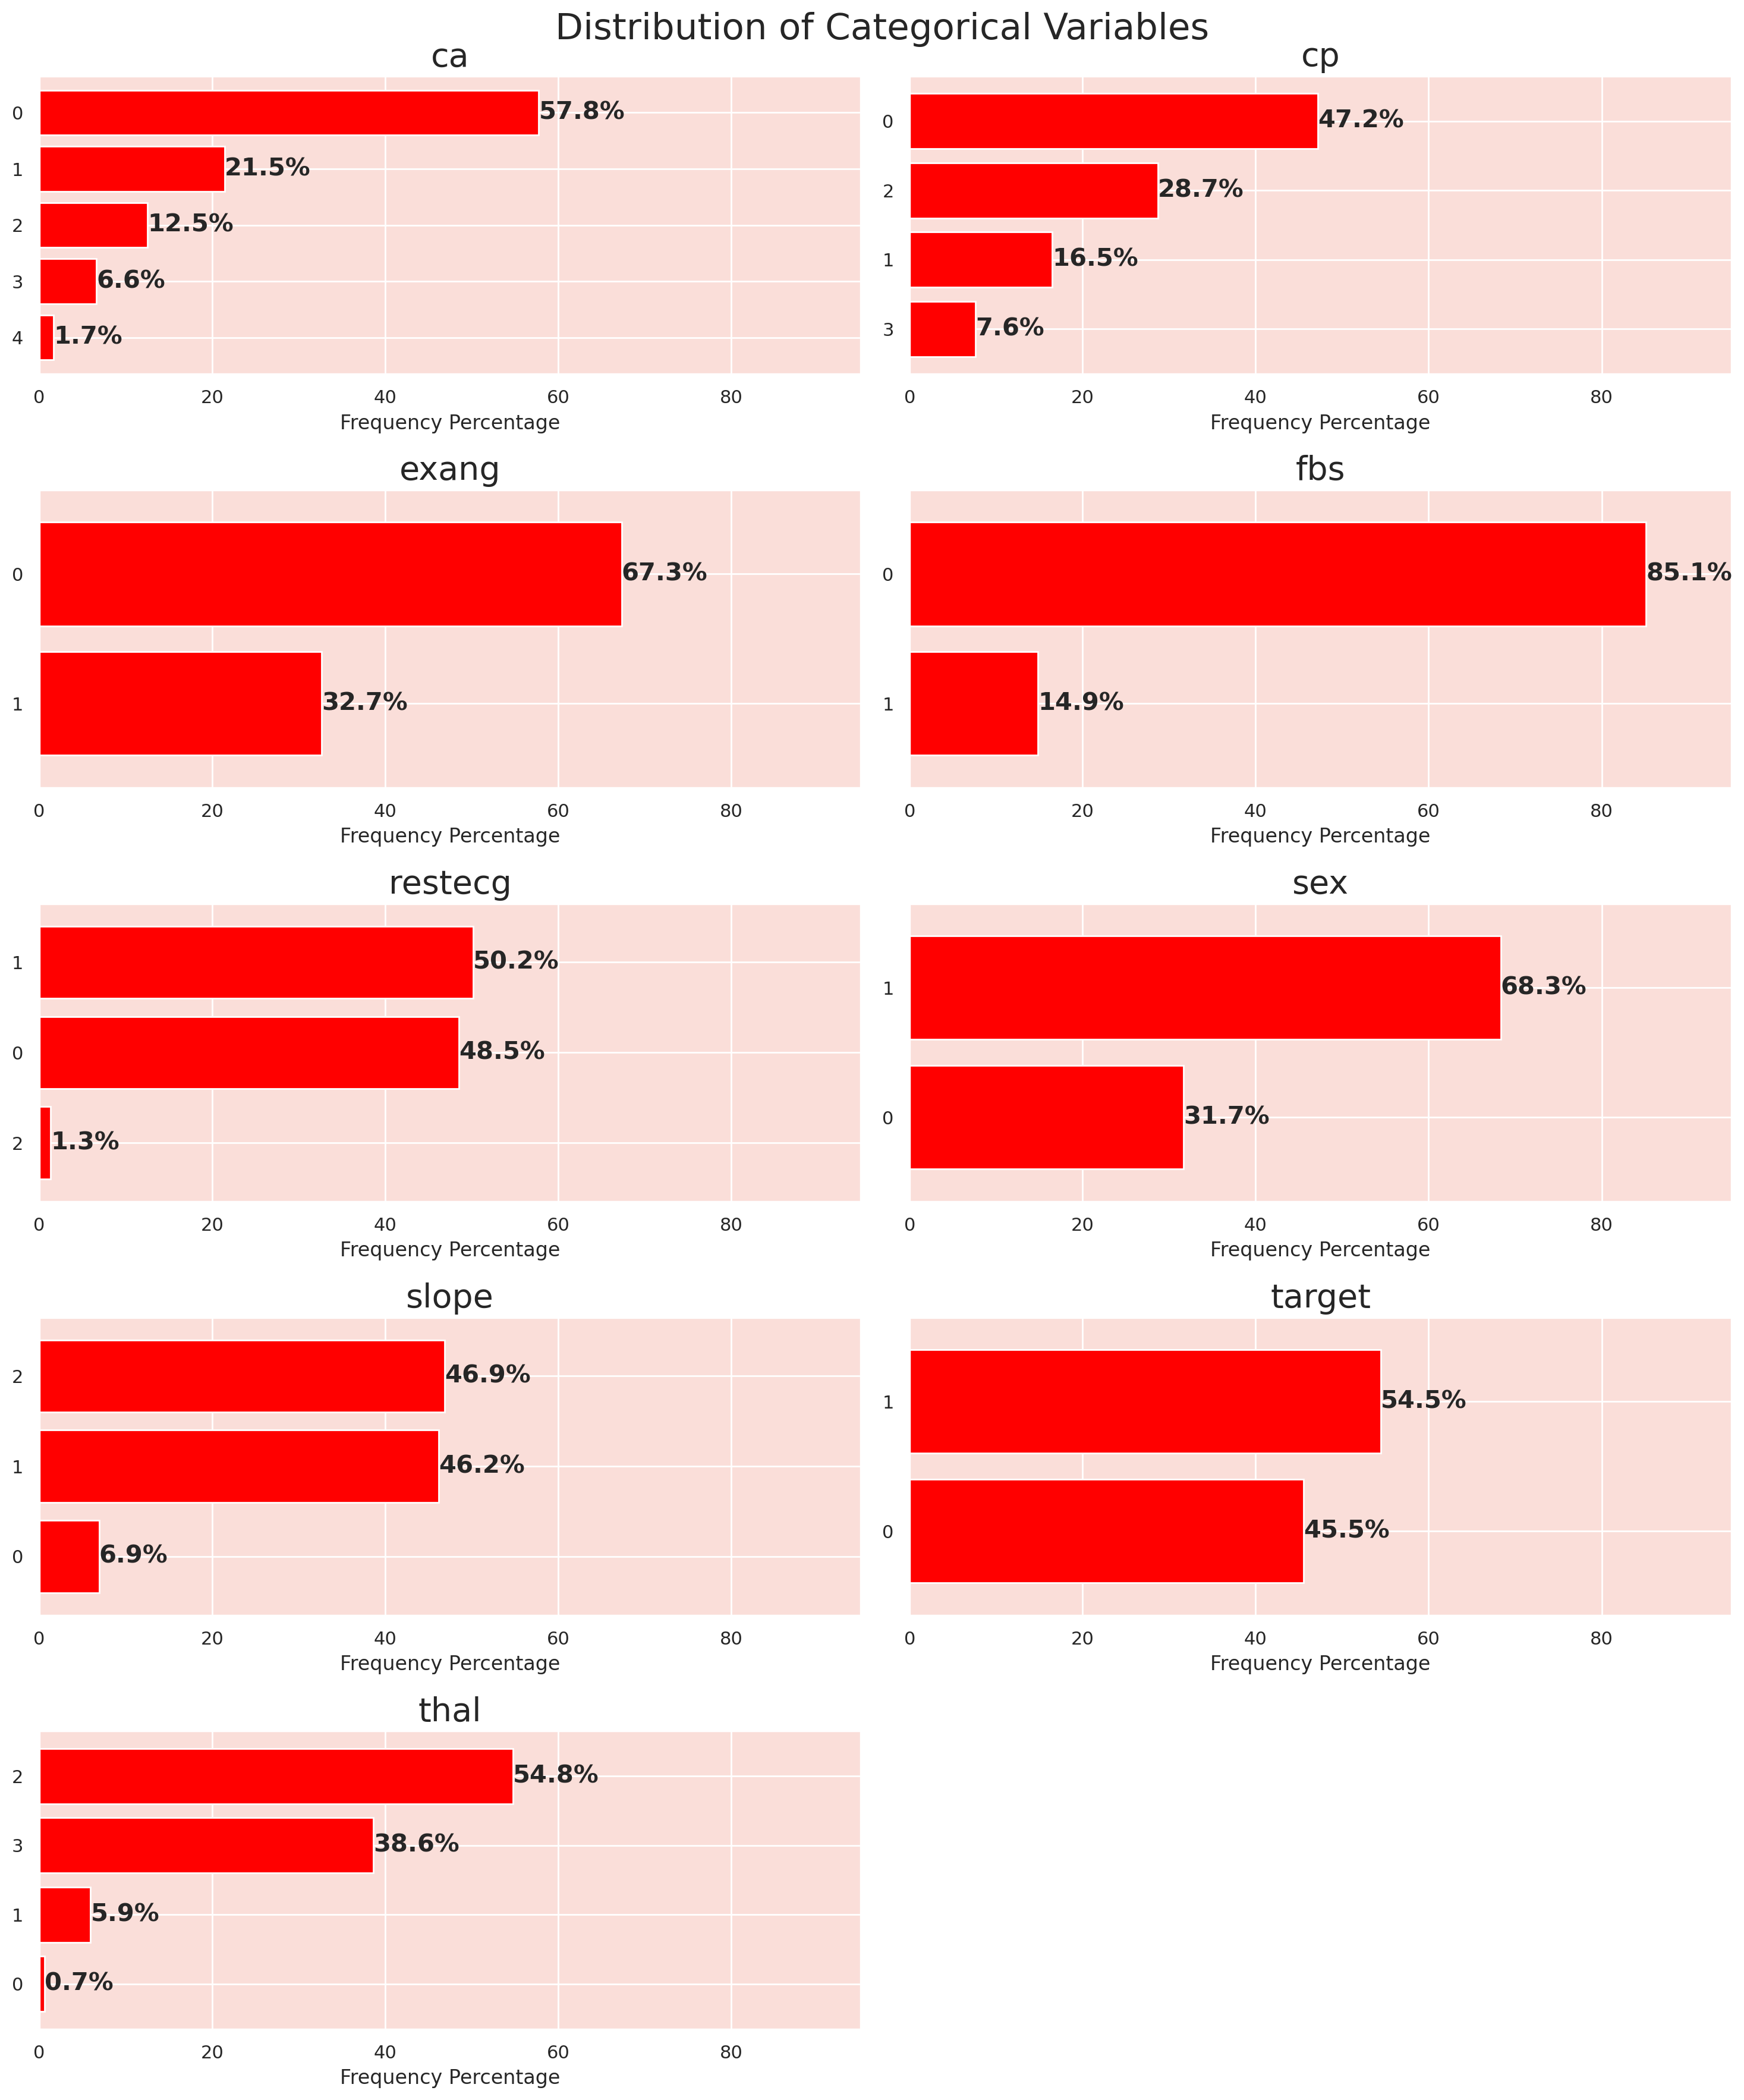

In [ ]:
# Set up a 5x2 grid layout for subplots.
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop through each categorical feature to plot bar charts.
for i, col in enumerate(categorical_features):
    # Determine the row and column index for the subplot.
    row = i // 2
    col_idx = i % 2

    # Calculate the frequency percentages of each category within the feature.
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot a horizontal bar chart for the frequency percentages.
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Add text labels with frequency percentages to each bar.
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    # Set the x-axis limit for consistency.
    ax[row, col_idx].set_xlim([0, 95])
    # Label the x-axis
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    # Set the title for each subplot.
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

# Turn off the last subplot (bottom-right) to avoid empty plot space.
ax[4,1].axis('off')

# Set the main title for the entire figure.
plt.suptitle('Distribution of Categorical Variables', fontsize=22)

# Adjust layout to prevent overlapping and improve readability.
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Display the plot.
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:112%; text-align:left">

<h3 align="left"><font color=black><b>✅ Inferences:</font></h3></b>
    
* **Gender (`sex`)**: The dataset is predominantly composed of female patients, forming a significant majority.

* **Type of Chest Pain (`cp`)**: There is a variety of chest pain types among the patients. Type 0 (Typical angina) appears to be the most common, but the exact distribution of the different types can be seen in the bar plots.

* **Fasting Blood Sugar (`fbs`)**: The majority of patients have fasting blood sugar levels below 120 mg/dl, indicating that high blood sugar is not a prevalent condition in this dataset.

* **Resting Electrocardiographic Results (`restecg`)**: The dataset shows various resting electrocardiographic outcomes, with some types being more common than others. The exact distribution can be assessed from the plots.

* **Exercise-Induced Angina (`exang`)**: Most patients do not experience exercise-induced angina, suggesting it is not a common symptom among the patients in this dataset.

* **Slope of the Peak Exercise ST Segment (`slope`)**: There are different slopes of the peak exercise ST segment in the dataset. One specific type might be more common, and its distribution can be inferred from the bar plots.

* **Number of Major Vessels Colored by Fluoroscopy (`ca`)**: Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequent.

* **Thalium Stress Test Result (`thal`)**: The dataset shows a variety of thalium stress test results. One particular type seems to be more prevalent, with the exact distribution visible in the plots.


### <b><span style='color:#ff826e'>Step 4.2 - </span><span style='color:red'> Bivariate Analysis.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**For our bivariate analysis of the dataset's features in relation to the target variable:**

* For __continuous data__: **I will use bar plots to show the average value of each feature for the different target classes, and KDE plots to understand the distribution of each feature across the target classes. This helps to identify how each feature differs between the two target outcomes.**

    
* For __categorical data__: **I will use 100% stacked bar plots to illustrate the proportion of each category across the target classes. This provides a comprehensive view of how different categories within a feature relate to the target.**

**These visualization techniques will help us gain a deeper understanding of the relationship between individual features and the target, revealing potential predictors for heart disease.**

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Step 4.2.1 -</span><span style='color:red'> Numerical Features vs Target.</span></b>  

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
**I will visualize each continuous feature against the target using two types of charts:**

* __Bar plots__ - **Showing the mean values.**
* __KDE plots__ - **Displaying the distribution for each target category.**

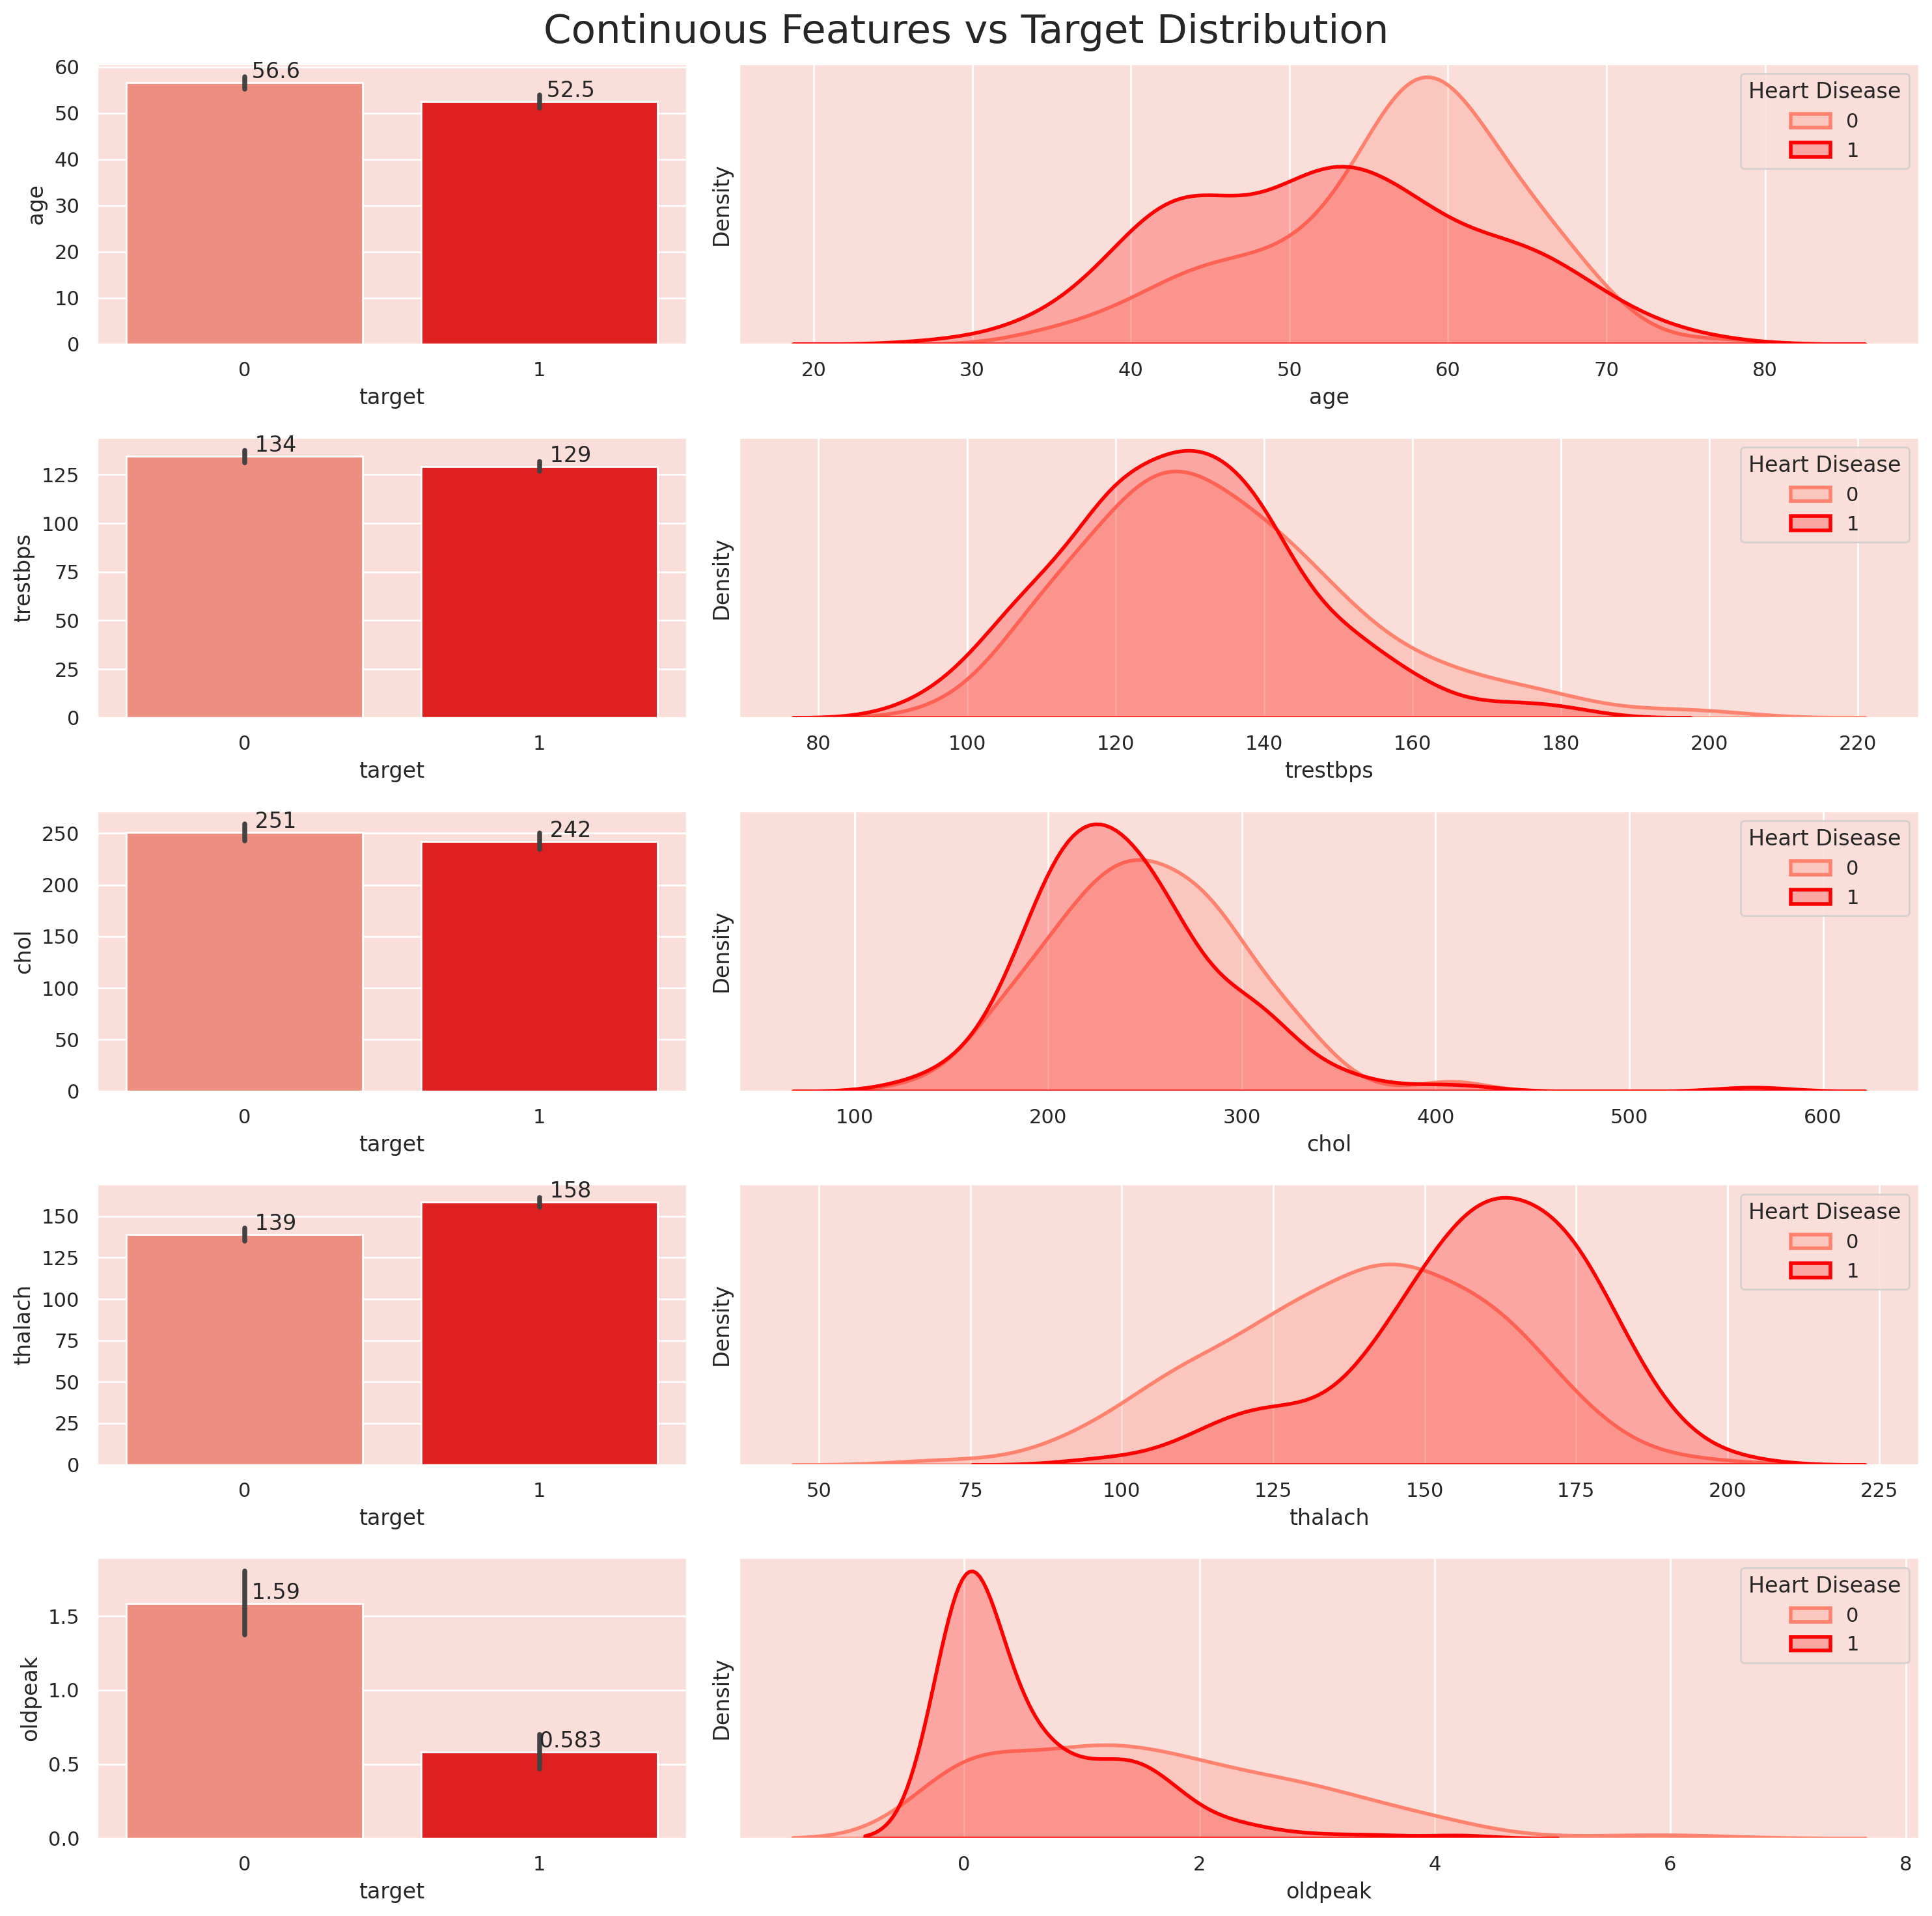

In [ ]:
# Set the color palette for the plots.
sns.set_palette(['#ff826e', 'red'])

# Create subplots with a grid layout for each continuous feature.
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to generate bar plots and KDE plots.
for i, col in enumerate(continuous_features):
    # Create a bar plot showing the mean value of the feature for each target category.
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])

    # Create a KDE plot showing the distribution of the feature for target category 0 (no heart disease)
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    # Create a KDE plot showing the distribution of the feature for target category 1 (heart disease)
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    # Remove y-axis ticks for the KDE plot.
    ax[i,1].set_yticks([])
    # Add a legend to the KDE plot.
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Add mean value labels to the bar plot.
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the main title for the entire figure.
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
# Adjust layout to prevent overlapping.
plt.tight_layout()
# Display the plot.
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=black><b>✅ Inferences:</b></font></h3>

* **Age (`age`)**: The distributions indicate that patients with heart disease tend to be slightly younger on average compared to those without heart disease. The mean age is higher for patients without heart disease.

* **Resting Blood Pressure (`trestbps`)**: The KDE plot shows overlapping distributions for both categories, with nearly identical mean values, suggesting that this feature has limited discriminative power.

* **Serum Cholesterol (`chol`)**: Cholesterol levels are similar for both categories, but the mean cholesterol level is slightly lower for patients with heart disease.

* **Maximum Heart Rate Achieved (`thalach`)**: There is a noticeable difference in distributions. Patients with heart disease tend to achieve a higher maximum heart rate during stress tests compared to those without heart disease.

* **ST Depression (`oldpeak`)**: The ST depression induced by exercise relative to rest is significantly lower for patients with heart disease, with their distribution peaking near zero. In contrast, the non-disease category has a broader spread. <br><br>


Based on the visual differences in distributions and mean values, **Maximum Heart Rate (`thalach`)** appears to have the most significant impact on heart disease status, followed by **ST Depression (`oldpeak`)** and **Age (`age`)**.


### <b><span style='color:#ff826e'>Step 4.2.2 - </span><span style='color:red'> Analyzing Categorical Features vs Target.</span></b>  

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**I will create 100% stacked bar plots for each categorical feature to illustrate the proportion of each category within the two target classes. These plots will include exact counts and percentages for clarity.**

In [ ]:
# Remove 'target' from the categorical_features.
categorical_features = [feature for feature in categorical_features if feature != 'target']

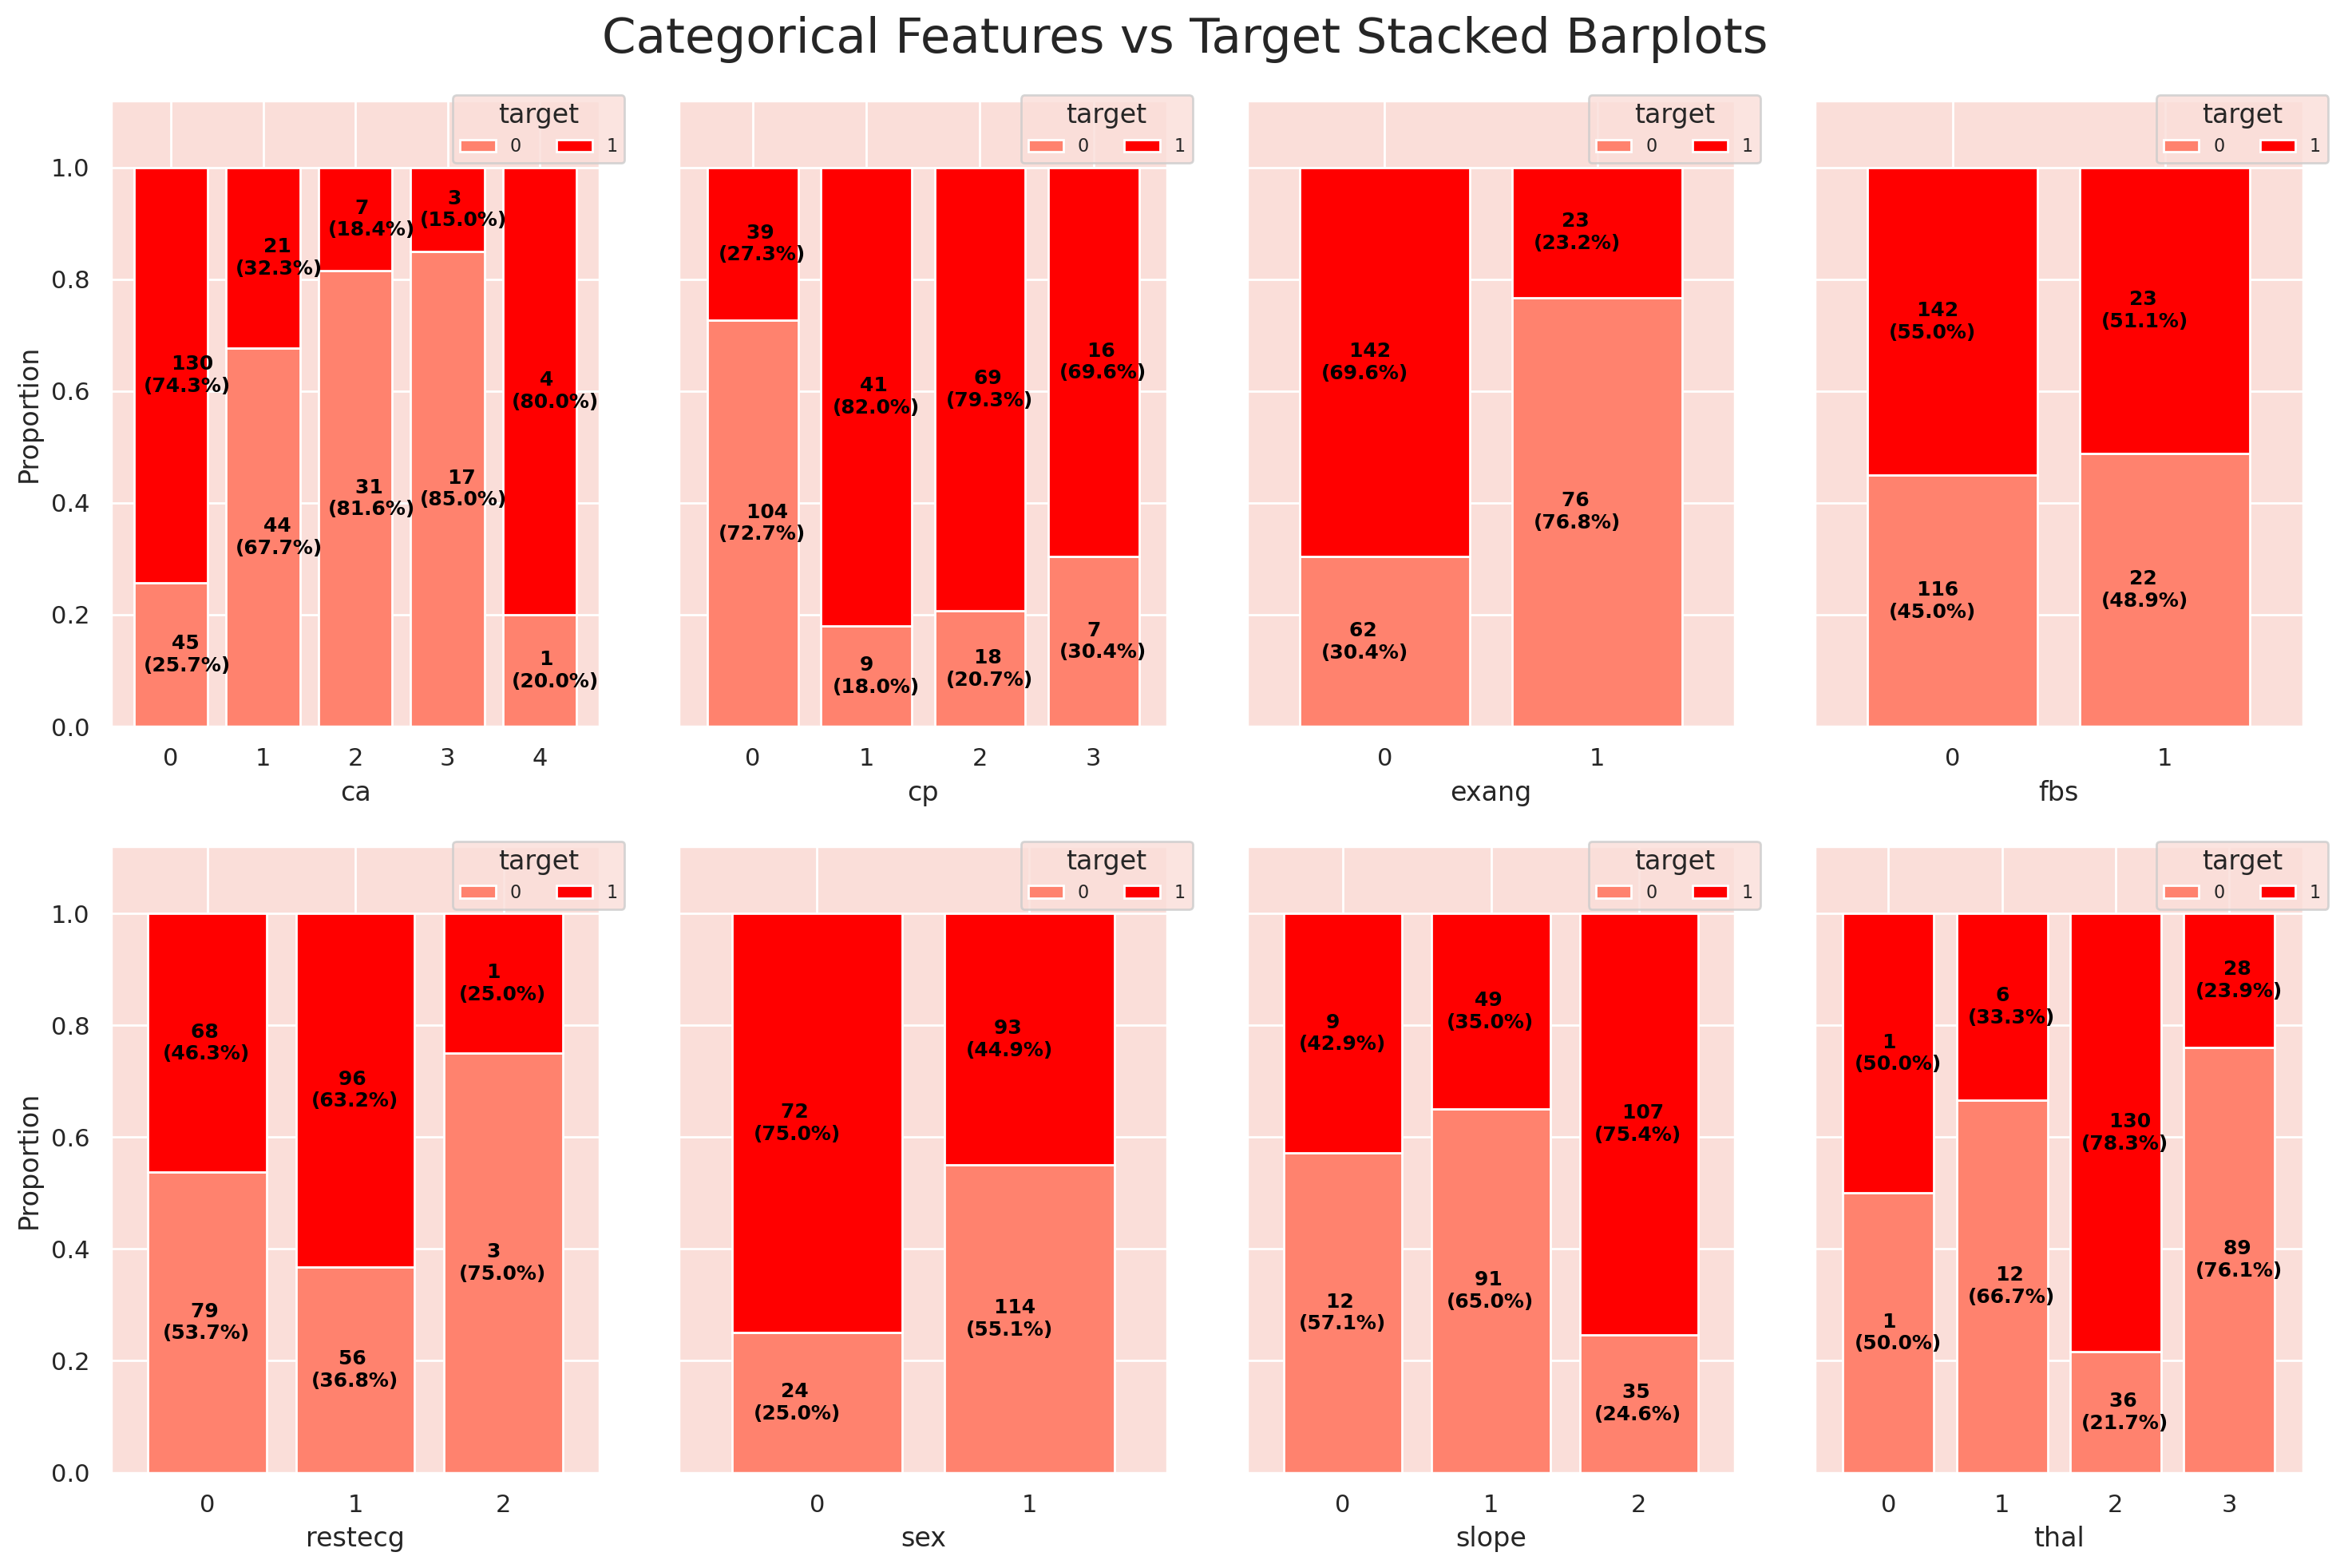

In [ ]:
# Create a figure with a grid of subplots (2 rows, 4 columns)
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

# Loop through each categorical feature.
for i, col in enumerate(categorical_features):

    # Create a cross tabulation showing the count of target values for each category of the feature.
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])

    # Create a cross tabulation showing the proportion of target values for each category of the feature.
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define a colormap for the bar plots.
    cmp = ListedColormap(['#ff826e', 'red'])

    # Determine the subplot location (row and column)
    x, y = i // 4, i % 4
    # Plot stacked bar charts for the proportion data.
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add text annotations for the proportions and counts on the bars.
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    # Add a legend to the subplot.
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set the y-axis limit for the subplot.
    ax[x,y].set_ylim([0,1.12])
    # Rotate x-axis tick labels for better readability.
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)

# Set the main title for the entire figure.
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
# Adjust layout to prevent overlap.
plt.tight_layout()
# Display the plot.
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=black><b>✅ Inferences:</font></h3></b>

* **Number of Major Vessels (`ca`)**: **Most patients with heart disease have fewer major vessels colored by fluoroscopy. As the number of colored vessels increases, the proportion of patients with heart disease decreases. Patients with 0 colored vessels have a higher incidence of heart disease.**

* **Chest Pain Type (`cp`)**: **Different types of chest pain show varied proportions of heart disease. Types 1, 2, and 3 have a higher incidence of heart disease compared to type 0, suggesting chest pain type is a significant predictor.**

* **Exercise Induced Angina (`exang`)**: **Patients without exercise-induced angina (0) show a higher incidence of heart disease compared to those with it (1). This feature significantly impacts the target variable.**

* **Fasting Blood Sugar (`fbs`)**: **The distribution between patients with fasting blood sugar > 120 mg/dl (1) and those without it (0) is relatively similar, indicating `fbs` might have a limited impact on heart disease prediction.**

* **Resting Electrocardiographic Results (`restecg`)**: **Type 1 shows a higher incidence of heart disease, suggesting this feature has some influence on the outcome.**

* **Sex (`sex`)**: **Females (1) have a lower incidence of heart disease compared to males (0), indicating that gender is an influential factor in predicting heart disease.**

* **Slope of the Peak Exercise ST Segment (`slope`)**: **Slope type 2 has a significantly higher incidence of heart disease, highlighting its potential as a strong predictor.**

* **Thalium Stress Test Result (`thal`)**: **The reversible defect category (2) shows a higher incidence of heart disease compared to other categories, emphasizing its importance in prediction.** <br><br>

**In summary, based on the visual representation:**

* **High Impact on Target**: `ca`, `cp`, `exang`, `sex`, `slope`, and `thal`
* **Moderate Impact on Target**: `restecg`
* **Low Impact on Target**: `fbs`

### <h3 style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"><b>Step 5 - Data Preprocessing.</b></h3>

### <b><span style='color:#ff826e'>Step 5.1 - </span><span style='color:red'> Removal of Irrelevant Features.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**Based on our exploratory data analysis (EDA), all features in the dataset are deemed relevant. No columns appear redundant or irrelevant.**

**Therefore, we will retain all features to ensure no valuable information is omitted, especially given the dataset's small size.**

### <b><span style='color:#ff826e'>Step 5.2 - </span><span style='color:red'> Treatment of Missing Values.</span></b>

In [ ]:
# Check for missing values in the dataset.
df.isnull().sum().sum()

0

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
**Our inspection confirms that there are no missing values in the dataset. This is ideal as it eliminates the need for imputation or removal, which could introduce bias or further reduce our already limited dataset size.**


### <b><span style='color:#ff826e'>Step 5.3 - </span><span style='color:red'> Handling Outliers.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**I will identify outliers in the continuous features using the Interquartile Range (IQR) method.**

In [ ]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
# Calculate the first quartile (25th percentile) for each continuous feature.
Q1 = df[continuous_features].quantile(0.25)
# Calculate the third quartile (75th percentile) for each continuous feature.
Q3 = df[continuous_features].quantile(0.75)
# Calculate the Interquartile Range (IQR) by subtracting Q1 from Q3.
IQR = Q3 - Q1
# Identify outliers by defining any data point that falls more than 1.5 times the IQR below Q1 or above Q3.
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

# Display the count of outliers for each specified continuous feature.
outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
**Upon examining the specified continuous features, we discovered outliers as detailed below:**

* **__`trestbps`__: 9 outliers.**
* **__`chol`__: 5 outliers.**
* **__`thalach`__: 1 outlier.**
* **__`oldpeak`__: 5 outliers.**
* **__`age`__: No outliers.**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=black><b>Outlier Sensitivity Across Different Algorithms:</b></font></h3>

* <b>SVM (Support Vector Machine):</b> **SVMs are prone to outlier sensitivity. Outliers can affect the selection of support vectors, which are critical in defining the decision boundary, thus potentially compromising the classifier’s effectiveness.**
    
* <b>Decision Trees (DT) and Random Forests (RF):</b> **These tree-based methods show resilience against outliers. Splits in the data during tree construction isolate outliers into leaf nodes, minimizing their influence on the model’s decisions.**
    
* <b>K-Nearest Neighbors (KNN):</b> **KNN is highly susceptible to outliers as its classification relies on the distances between data points. Outliers can significantly skew these distance calculations, affecting accuracy.**
    
* <b>AdaBoost:</b> **While typically robust due to its use of decision trees as base learners, AdaBoost's iterative approach to adjusting weights can make it overly sensitive to outliers, particularly if they are consistently misclassified.**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=black><b>Strategies for Managing Outliers:</b></font></h3>
    
* <b>Outlier Removal:</b> **Directly eliminate data points that are beyond a defined threshold, commonly determined by methods such as the Interquartile Range (IQR).**
    
* <b>Outlier Capping:</b> **Rather than removing outliers, cap them at a specified limit, like the 1st or 99th percentile, to contain their effect.**
    
* <b>Data Transformations:</b> **Use transformations such as logarithmic or Box-Cox adjustments to lessen the impact of outliers and foster a more normal distribution.**
    
* <b>Robust Scaling:</b> **Employ techniques such as RobustScaler from Scikit-learn, which uses statistics resistant to outliers to scale features.**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h3 align="left" style="font-weight:bold;"><font color=black><b>Conclusion:</font></h3></b>

**Given the characteristics of the algorithms (particularly SVM and KNN) and the limited size of our dataset, directly removing outliers may not be the most effective strategy. Instead, we will prioritize using transformations such as Box-Cox in the upcoming steps to diminish the influence of outliers and enhance the data's suitability for modeling.**



<h3><b><span style='color:#ff826e'>Step 5.4 - </span><span style='color:red'> Encoding of Categorical Features.</span></b></h3>


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:112%; text-align:left">

<h3 align="left"><font color=black><b>Decision on One-hot Encoding:</font></h3></b>
    
**Based on the characteristics of each feature, we can determine the appropriate encoding strategy:**

1. **Nominal Variables**: **These variables lack a natural order and should be one-hot encoded to prevent the model from interpreting them numerically, which might imply a non-existent order.**

2. **Ordinal Variables**: **These variables exhibit a clear order, which can provide valuable information to the model, and thus, they generally do not require one-hot encoding.** <br><br>


<h3 align="left"><font color=black><b>From our Feature Assessment:</font></h3></b>

- **`sex`**: This binary variable differentiates between male and female and does not necessitate one-hot encoding.

    
- **`cp`** (Chest Pain Type): As there is no inherent ranking between the different types of chest pain, such as Typical angina or Atypical angina, this should be one-hot encoded as it is nominal.
  
    
- **`fbs`** (Fasting Blood Sugar): Another binary variable, representing above or below a threshold, which does not require one-hot encoding.

    
- **`restecg`** (Resting Electrocardiographic Results): The categories, including "Normal", "Having ST-T wave abnormality", and others, do not display a clear order, indicating the need for one-hot encoding.

    
- **`exang`** (Exercise Induced Angina): As a simple yes/no binary variable, it does not require one-hot encoding.

    
- **`slope`** (Slope of the Peak Exercise ST Segment): Given its ordinal descriptions (Upsloping, Flat, Downsloping), it indicates a sequential order and does not need one-hot encoding.

    
- **`ca`** (Major Vessels): Reflecting a count of vessels, it inherently carries ordinal data and thus, does not require one-hot encoding.

    
- **`thal`** (Thallium Stress Test): The different results like "Normal", "Fixed defect", and "Reversible defect" are best treated as nominal, making one-hot encoding appropriate here.<br><br>

<h3 align="left"><b>Summary:</h3></b>

- **Variables Requiring One-Hot Encoding**: **`cp`**, **`restecg`**, **`thal`**
- **Variables Not Requiring One-Hot Encoding**: **`sex`**, **`fbs`**, **`exang`**, **`slope`**, **`ca`**

In [ ]:
# Apply one-hot encoding to categorical features specified, removing the first category to avoid dummy variable trap.
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert other categorical variables that do not require one-hot encoding into integer data type for consistency.
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

# Display the data types of all columns to confirm successful conversion and encoding.
df_encoded.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1           uint8
cp_2           uint8
cp_3           uint8
restecg_1      uint8
restecg_2      uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

In [ ]:
# Displaying the top rows of the DataFrame to inspect the results after one-hot encoding.
df_encoded.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  target  \
0   63    1       145   233    1      150      0      2.3      0   0       1   
1   37    1       130   250    0      187      0      3.5      0   0       1   
2   41    0       130   204    0      172      0      1.4      2   0       1   
3   56    1       120   236    0      178      0      0.8      2   0       1   
4   57    0       120   354    0      163      1      0.6      2   0       1   

   cp_1  cp_2  cp_3  restecg_1  restecg_2  thal_1  thal_2  thal_3  
0     0     0     1          0          0       1       0       0  
1     0     1     0          1          0       0       1       0  
2     1     0     0          0          0       0       1       0  
3     1     0     0          1          0       0       1       0  
4     0     0     0          1          0       0       1       0

### <b><span style='color:#ff826e'>Step 5.5 - </span><span style='color:red'> Implementing Feature Scaling.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**Feature scaling is an essential preprocessing technique for algorithms that depend on the magnitude or scale of features, such as SVM, KNN, and various linear models that utilize distances or gradients. Without scaling, models may be disproportionately influenced by features with larger values, compromising their effectiveness.** <br><br>

<h3 align="left"><font color=black><b>Reason for Postponement:</font></h3></b>

**Although feature scaling is critical for certain models, not all algorithms require it. For example, models based on Decision Trees do not need scaled data due to their scale-invariant nature. Considering our use of a diverse set of models—some requiring scaling and others not—we plan to incorporate scaling later through pipelines. This strategy allows us to apply scaling selectively to only those models that benefit, ensuring both flexibility and efficiency in our modeling approach.** <br><br>


### <b><span style='color:#ff826e'>Step 5.6 -</span><span style='color:red'> Addressing Feature Skewness.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**The Box-Cox transformation is an effective technique for stabilizing variance and promoting a more normal-like distribution in data. It's especially valuable when the specific type of distribution is unclear, as it adjusts to the optimal power transformation needed. However, a critical limitation of the Box-Cox transformation is that it only applies to positive data, so caution is necessary when dealing with features that include zero or negative values.**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
<h3 align="left"><font color=black><b>Addressing Skewness in Features & Preventing Data Leakage:</font></h3></>

When preprocessing data, particularly when applying transformations such as Box-Cox, it is critical to avoid __data leakage__. __Data leakage__ occurs when information from outside the training dataset is inadvertently used to inform the transformation or training of the model, potentially leading to overly optimistic performance estimates. <br><br>

<h3 align="left"><font color=black><b>Steps to Prevent Data Leakage and Ensure Robust Model Generalization:</font></h3></b>

__1- Data Splitting:__ Initially, we will divide our dataset into separate training and test sets. This division ensures that we have an independent dataset to assess our model's performance, which remains unaffected by the training and preprocessing steps.

__2- Box-Cox Transformation:__ We will assess the distribution of continuous features in the training set for skewness. Should skewness be present, we will apply the Box-Cox transformation to normalize the distributions. Crucially, the parameters for the Box-Cox transformation will be determined using only the training data.

__3- Applying Transformations to Test Data:__ After establishing the transformation parameters from the training set, these same parameters will be applied to the test set. This method guarantees that no information from the test set influences the training process.

__4. Hyperparameter Tuning & Cross-Validation:__ Given the size of our dataset, we will utilize __cross-validation within the training set for tuning hyperparameters__. This strategy allows us to better understand how our model may perform with unseen data without actually using the test set. The test set is strictly used for final model performance evaluation.

By adhering to these steps, we establish a thorough training protocol, reduce the potential for data leakage, and aim to obtain a realistic evaluation of our model’s effectiveness on new data. <br><br>

In [ ]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [ ]:
# Splitting data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
**The Box-Cox transformation requires all data to be strictly positive. To transform the `oldpeak` feature using Box-Cox, we can add a small constant (e.g., 0.001) to ensure all values are positive.**

In [ ]:
# Adding a small constant to 'oldpeak' to ensure all values are positive, which is necessary for certain transformations.
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

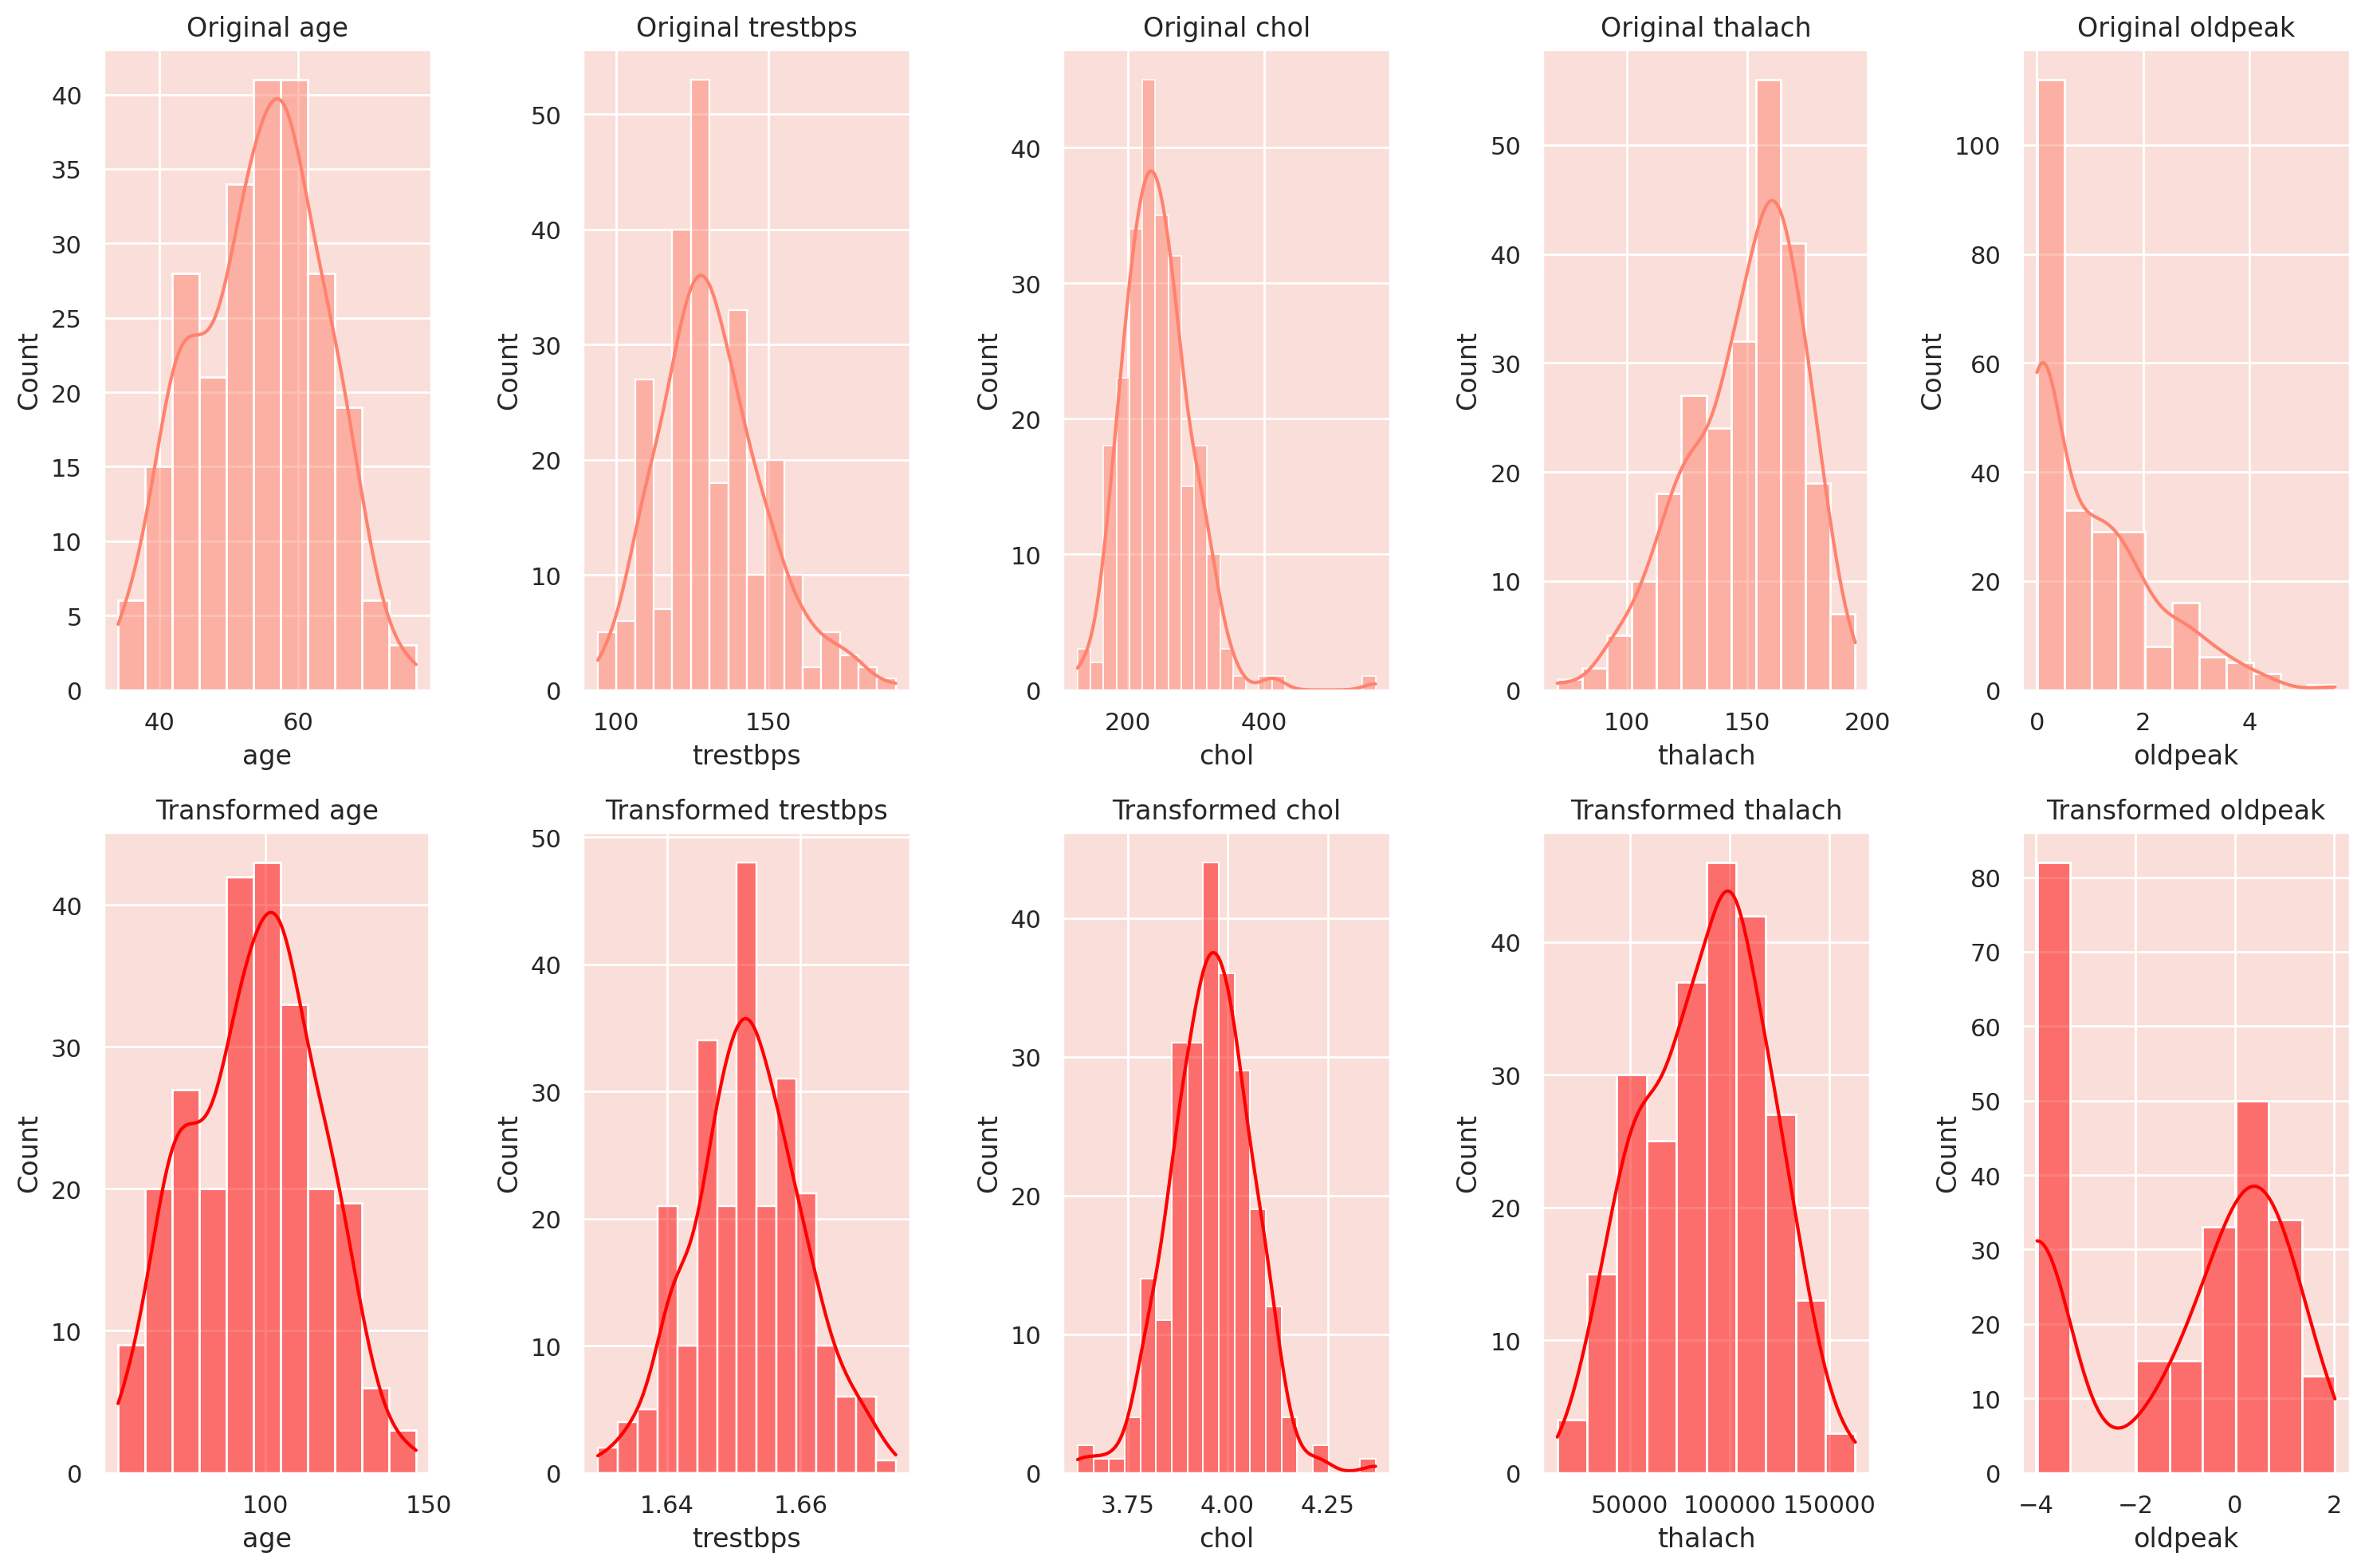

In [ ]:
# Setting up a subplot grid for visualizing distributions of continuous features.
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Plotting original distributions of each continuous feature.
for i, col in enumerate(continuous_features):
    # Plot histogram with a kernel density estimate to visualize distribution.
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')

# Apply Box-Cox Transformation to make data more normally distributed.
# Initialize a dictionary to store lambda values for each feature after transformation.
lambdas = {}

for i, col in enumerate(continuous_features):
    # Check if the feature contains only positive values to be eligible for Box-Cox Transformation.
    if X_train[col].min() > 0:
        # Apply Box-Cox transformation to training data and store the lambda used.
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Apply the same lambda to transform the test data.
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col])
        # Plot the transformed data.
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        # For features with non-positive values, plot original distribution.
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

# Adjust layout for better readability and display the plot.
fig.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
<h3 align="left"><font color=black><b>✅ Inferences:</font></h3></b>
    
1. **Age**: **The transformation has resulted in a more symmetrical distribution of age, approximating it closer to a normal distribution.**

2. **Trestbps**: **Post-transformation, the resting blood pressure distribution has become more normal-like, exhibiting less skewness.**

3. **Chol**: **The cholesterol levels have achieved a more normal distribution shape after applying the Box-Cox transformation.**

4. **Thalach**: **Thalach was relatively symmetric even before the transformation and remains so afterward, suggesting that its original distribution was nearly normal.**

5. **Oldpeak**: **Although the transformation has made improvements to the oldpeak distribution, it still does not fully mimic a normal distribution. This might be due to the inherent characteristics of the data or existing outliers. To further normalize this distribution, we might consider using the Yeo-Johnson transformation, which effectively handles zero and negative values.**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
<h3 align="left"><font color=black><b>Conclusion:</font></h3></b>

**The process of making features more normal-like is crucial for minimizing the effects of outliers, particularly advantageous for distance-based algorithms such as SVM and KNN. By diminishing outlier impacts, these algorithms can calculate distances more accurately and deliver more dependable outcomes.**

In [ ]:
X_train.head()

age  sex  trestbps      chol  fbs       thalach  exang   oldpeak  \
269   99.775303    1  1.652121  4.044510    1  34193.175862      1  0.490856   
191  104.060224    1  1.651136  3.909224    0  61564.541974      1  0.846853   
15    87.096543    0  1.646937  3.916242    0  97354.732537      0  0.490856   
224   95.519131    1  1.641028  3.960430    0  55975.802227      1  1.130195   
250   89.190680    1  1.656716  4.069854    0  51729.405015      1  1.634849   

     slope  ca  cp_1  cp_2  cp_3  restecg_1  restecg_2  thal_1  thal_2  thal_3  
269      0   0     0     0     0          0          0       0       0       1  
191      1   3     0     0     0          0          0       0       0       1  
15       1   0     0     1     0          1          0       0       1       0  
224      1   1     0     0     0          1          0       0       0       1  
250      1   3     0     0     0          1          0       0       0       1

### <h3 style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"><b>Step 6 - Building the Decision Tree Model.</h3></b>

### <b><span style='color:#ff826e'></span><span style='color:red'> Step 6.1 - Defining the Base Decision Tree Model.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**Let's start by setting up the foundational DT model.**

In [ ]:
# Set up the initial Decision Tree classifier with a specific random state to ensure consistent results.
dt_base = DecisionTreeClassifier(random_state=0)

### <b><span style='color:#ff826e'></span><span style='color:red'>Step 6.2 -  Tuning Hyperparameters for the Decision Tree.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">


**Note: In medical settings, particularly when diagnosing diseases, it's crucial to prioritize high recall (sensitivity) for the positive class (patients with the condition). Achieving high recall ensures that the majority of actual cases are correctly identified, even at the cost of some false positives (healthy individuals incorrectly diagnosed). The logic is that it's preferable to deal with some false alerts rather than missing a diagnosis in someone who has the illness.**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**I am developing a function to identify the optimal hyperparameters that achieve the highest recall for the model. This method provides a consistent and repeatable framework for tuning hyperparameters in future models.**

In [ ]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    Optimizes hyperparameters for a classifier over a specified grid using GridSearchCV with cross-validation.

    Parameters:
        clf: Classifier to tune
        param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values
        X_train: Training feature dataset
        y_train: Training target dataset
        scoring: Performance measure to optimize
        n_splits: Number of folds in a (Stratified)KFold cross-validation

    Returns:
        A tuple containing the best model and its hyperparameters.
    '''

    # StratifiedKFold maintains the percentage of samples for each class.
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # GridSearchCV performs hyperparameter tuning to find the best model configuration.
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the model with the best combination of parameters found.
    clf_grid.fit(X_train, y_train)

    # Extract the best hyperparameters.
    best_hyperparameters = clf_grid.best_params_

    # Return the best fitted model and its parameters.
    return clf_grid.best_estimator_, best_hyperparameters

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**I will configure the hyperparameter grid and use the `tune_clf_hyperparameters` function to identify the best hyperparameters for our Decision Tree model.**

In [ ]:
# Define the grid of hyperparameters to tune for the Decision Tree.
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Criteria to measure the quality of a split.
    'max_depth': [2, 3],  # Maximum depth of the tree.
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node.
}

In [ ]:
# Perform hyperparameter tuning using a predefined grid.
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Print the optimal hyperparameters for the Decision Tree model.
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


____
<a id="dt_eval"></a>
### <b><span style='color:#ff826e'></span><span style='color:red'> Step 6.3 - Evaluating the Decision Tree Model.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**Let's assess the performance of our Decision Tree model on both the training and test datasets.**

In [ ]:
# Assess the performance of the optimized decision tree model on the train dataset and display the classification report.
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.78      0.77      0.78       132

    accuracy                           0.76       242
   macro avg       0.76      0.76      0.76       242
weighted avg       0.76      0.76      0.76       242



In [ ]:
# Assess the performance of the optimized decision tree model on the test dataset and display the classification report.
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**Since the metric values for both the training and test datasets are similar and show no significant differences, it suggests that the model is not overfitting.**

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**So, let's develop a function that compiles the metrics for each model into a dataframe, enabling a comprehensive comparison of all models later on.**

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.

    Parameters:
        model (estimator): The trained model to evaluate.
        X_test (array-like): Features from the test dataset.
        y_test (array-like): True labels for the test dataset.
        model_name (str): A string label for the model to index the resulting DataFrame.

    Returns:
        df (DataFrame): A DataFrame with evaluation metrics for the model, indexed by the model name.
    """

    # Use the model to make predictions on the test data.
    y_pred = model.predict(X_test)

    # Generate a classification report as a dictionary, where each output label is a key.
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract relevant metrics from the report and store them in a dictionary.
    metrics = {
        "precision_0": report["0"]["precision"],  # Precision for class 0.
        "precision_1": report["1"]["precision"],  # Precision for class 1.
        "recall_0": report["0"]["recall"],        # Recall for class 0.
        "recall_1": report["1"]["recall"],        # Recall for class 1.
        "f1_0": report["0"]["f1-score"],          # F1-score for class 0.
        "f1_1": report["1"]["f1-score"],          # F1-score for class 1.
        "macro_avg_precision": report["macro avg"]["precision"],  # Macro-average precision.
        "macro_avg_recall": report["macro avg"]["recall"],        # Macro-average recall.
        "macro_avg_f1": report["macro avg"]["f1-score"],           # Macro-average F1-score.
        "accuracy": accuracy_score(y_test, y_pred)                # Overall accuracy of the model.
    }

    # Convert the metrics dictionary into a DataFrame for easy visualization, rounded to 2 decimal places.
    df = pd.DataFrame(metrics, index=[model_name]).round(2)

    return df

In [ ]:
# Evaluate the optimized Decision Tree model on the test dataset and display the results.
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
DT          0.8         0.78      0.71      0.85  0.75  0.81   

    macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
DT                 0.79              0.78          0.78      0.79

### <h3 style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"><b>Step 7 - Building the Random Forest Model.</h3></b>

### <b><span style='color:#ff826e'>Step 7.1 - </span><span style='color:red'> Defining the RF Base Model.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**First, let's establish the foundational RF model and configure the pipeline with feature scaling.**

In [ ]:
# Initialize the base Random Forest classifier with a random state for reproducibility.
rf_base = RandomForestClassifier(random_state=0)

<a id="rf_hp"></a>
### <b><span style='color:#ff826e'>Step 7.2 - </span><span style='color:red'> Tuning RF Hyperparameters.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
**Next, I will configure the hyperparameters grid and use the `tune_clf_hyperparameters` function to find the optimal settings for our Random Forest (RF) model.**

In [ ]:
# Define the grid of hyperparameters to tune for the Random Forest classifier.
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],  # Number of trees in the forest.
    'criterion': ['gini', 'entropy'],  # Criteria to split on at each node.
    'max_depth': [2, 3, 4],  # Maximum number of levels in each tree.
    'min_samples_split': [2, 3, 4, 5],  # Minimum number of samples required to split a node.
    'min_samples_leaf': [1, 2, 3],  # Minimum number of samples required at each leaf node.
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

In [ ]:
# Tune the hyperparameters using a grid search to find the best combination of parameters for the Random Forest model.
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)  # Print the best set of hyperparameters found.

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


### <b><span style='color:#ff826e'>Step 7.3 - </span><span style='color:red'> Evaluating the RF Model.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**Lastly, I am assessing the model's performance on both the training and test datasets.**

In [ ]:
# Assess the performance of the optimized KNN model on the training dataset.
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       110
           1       0.83      0.87      0.85       132

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.83      0.83      0.83       242



In [ ]:
# Assess the performance of the optimized RF model on the test dataset.
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**The RF model shows no signs of overfitting, given its consistent performance on both the training and test datasets.**

In [ ]:
# Evaluate the optimized Random Forest model on the test dataset and display the results.
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
RF         0.85         0.83      0.79      0.88  0.81  0.85   

    macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
RF                 0.84              0.83          0.83      0.84


### <h3 style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"><b>Step 8 - Building the KNN Model.</h3></b>


### <b><span style='color:#ff826e'>Step 8.1 - </span><span style='color:red'> Defining the KNN Base Model.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**First, let's establish the foundational KNN model and configure the pipeline with feature scaling.**

In [ ]:
# Define the base KNN model and set up the pipeline with scaling.
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

### <b><span style='color:#ff826e'>Step 8.2 - </span><span style='color:red'> Tuning KNN Hyperparameters.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**I'll set up the hyperparameters grid and utilize the tune_clf_hyperparameters function to identify the optimal hyperparameters for our KNN pipeline.**

In [ ]:
# Define the hyperparameter grid for KNN.
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),  # Number of neighbors to use.
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction.
    'knn__p': [1, 2]  # Power parameter for the Minkowski metric: 1 (Manhattan), 2 (Euclidean).
}

In [ ]:
# Perform hyperparameter tuning for KNN.
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('Optimal Hyperparameters for KNN: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}


### <b><span style='color:#ff826e'>Step 8.3 - </span><span style='color:red'> Evaluating the KNN Model.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**Let's assess the model's performance on both the training and test datasets.**

In [ ]:
# Assess the performance of the optimized KNN model on the training dataset.
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       110
           1       0.83      0.83      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



In [ ]:
# Assess the performance of the optimized KNN model on the test dataset.
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**The KNN model's similar performance on both training and test datasets suggests that there is no overfitting.**

In [ ]:
# Evaluate the KNN model on the test dataset.
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')

# Display the evaluation results for the KNN model.
knn_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
KNN         0.82         0.85      0.82      0.85  0.82  0.85   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
KNN                 0.83              0.83          0.83      0.84

### <b><h3 style="background-color:white; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Step 9 - Building the SVM Model.</b></h3>

### <b><span style='color:#ff826e'>Step 9.1 - </span><span style='color:red'> Defining the SVM Base Model.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**Let's start by defining the base SVM model and setting up the pipeline with feature scaling.**

In [ ]:
# Define the SVM pipeline with scaling.
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features.
    ('svm', SVC(probability=True))  # Support Vector Machine classifier with probability estimates.
])


### <b><span style='color:#ff826e'>Step 9.2 - </span><span style='color:red'> Tuning SVM Hyperparameters.</span></b>


**Let's set up the hyperparameter grid and use the tune_clf_hyperparameters function to identify the optimal hyperparameters for our SVM pipeline.**

In [ ]:
# Define the grid of hyperparameters for SVM tuning.
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],  # Regularization parameter.
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Kernel types.
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.
    'svm__degree': [2, 3, 4]  # Degree of the polynomial kernel function.
}

In [ ]:
# Perform hyperparameter tuning for the SVM model.
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('Optimal Hyperparameters for SVM: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}



### <b><span style='color:#ff826e'>Step 9.3 - </span><span style='color:red'> Evaluation of the SVM Model.</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

**We will now assess the performance of our SVM model on both the training and test datasets.**

In [ ]:
# Assess the performance of the optimized model on the training data.
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       110
           1       0.71      0.96      0.82       132

    accuracy                           0.77       242
   macro avg       0.82      0.75      0.75       242
weighted avg       0.81      0.77      0.76       242



In [ ]:
# Assess the performance of the optimized model on the test data.
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">
    
<h3 align="left"><font color=black><b>✅ Inferences:</font></h3></b>

The **recall of 0.97 for class 1** demonstrates the model's exceptional ability to correctly identify nearly all **true positive cases (i.e., patients with heart disease)**. This high recall is crucial in a medical setting where missing a potential heart disease patient could have severe consequences.

Moreover, the model maintains a balanced performance. An **F1-score of 0.83 for class 1** indicates that while the model excels in recall, it does not sacrifice precision. This balance ensures that the reduction in false negatives does not significantly increase false positives, thus avoiding unnecessary examinations of healthy individuals and minimizing the associated costs and efforts.

Overall, the model's performance is highly promising for medical diagnostics. It effectively prioritizes the accurate detection of patients with heart disease while maintaining a low rate of false alarms, making it a valuable tool in healthcare.

In [ ]:
# Evaluate the SVM model on the test dataset.
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')

# Display the evaluation results for the SVM model.
svm_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
SVM         0.94         0.73      0.57      0.97  0.71  0.83   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
SVM                 0.83              0.77          0.77      0.79

<a id="conclusion"></a>
<h3 style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"><b>Step 10 - Conclusion.</h3></b>



**In the vital context of diagnosing heart disease, our primary goal is to achieve a high recall for the positive class. Accurately identifying every potential heart disease case is crucial, as missing even a single diagnosis can have severe consequences. However, while aiming for high recall, it is equally important to maintain a balanced performance to avoid unnecessary medical interventions for healthy individuals. We will now evaluate our models against these essential medical benchmarks.**



In [ ]:
# Combine the evaluation dataframes into one.
all_evaluations = [dt_evaluation, rf_evaluation, knn_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sort the combined dataframe by 'recall_1' in descending order and round the values to 2 decimal places.
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
SVM         0.94         0.73      0.57      0.97  0.71  0.83   
RF          0.85         0.83      0.79      0.88  0.81  0.85   
DT          0.80         0.78      0.71      0.85  0.75  0.81   
KNN         0.82         0.85      0.82      0.85  0.82  0.85   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
SVM                 0.83              0.77          0.77      0.79  
RF                  0.84              0.83          0.83      0.84  
DT                  0.79              0.78          0.78      0.79  
KNN                 0.83              0.83          0.83      0.84

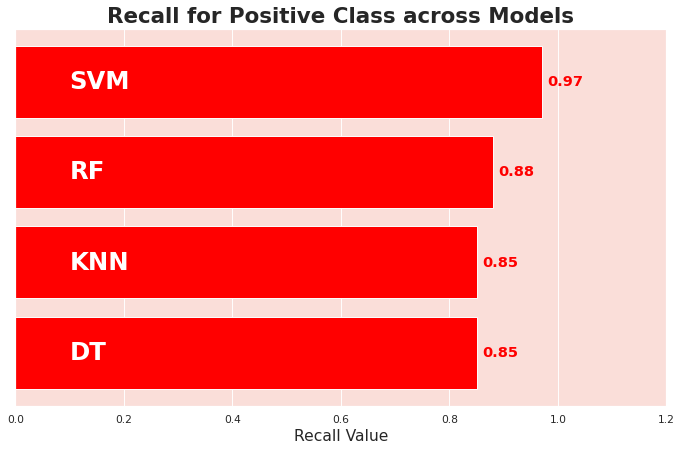

In [ ]:
# Sort the results by 'recall_1' in ascending order.
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Create a horizontal bar chart.
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')

# Annotate each bar with its value and the corresponding model name.
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove y-axis tick marks.
ax.set_yticks([])

# Set the x-axis limit.
ax.set_xlim([0, 1.2])

# Add a title and x-axis label.
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

### ✅ **Inferences:**

**The SVM model exhibits a strong ability to identify potential heart patients effectively. With a recall of 0.97 for class 1, it accurately identifies nearly all patients with heart disease, which is crucial in a medical context. Additionally, the model maintains a balanced performance, ensuring high recall without compromising precision, thereby preventing an excess of false alerts and maintaining system efficiency.**